Generating DTW plot...


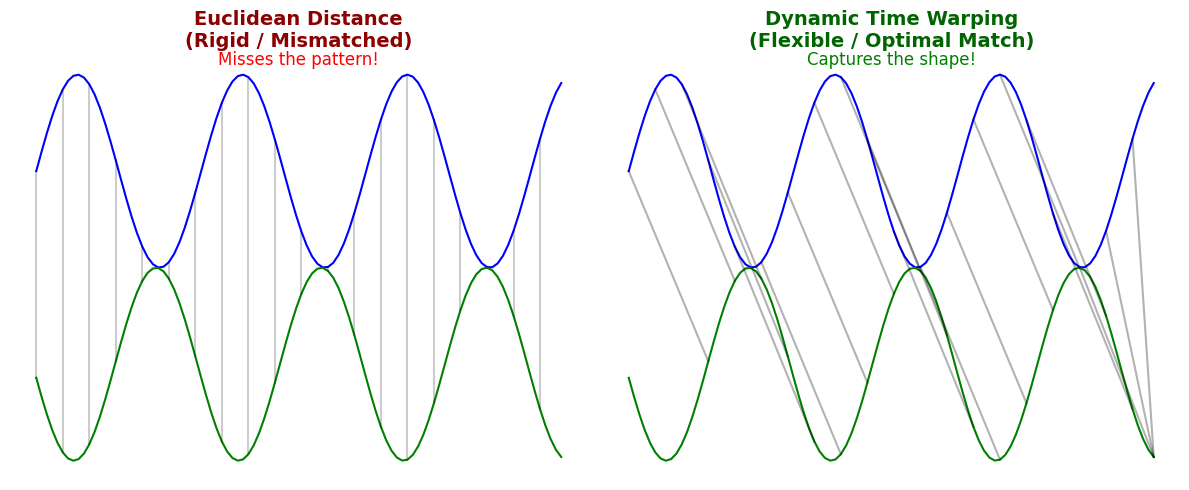

Generating EAC plot...


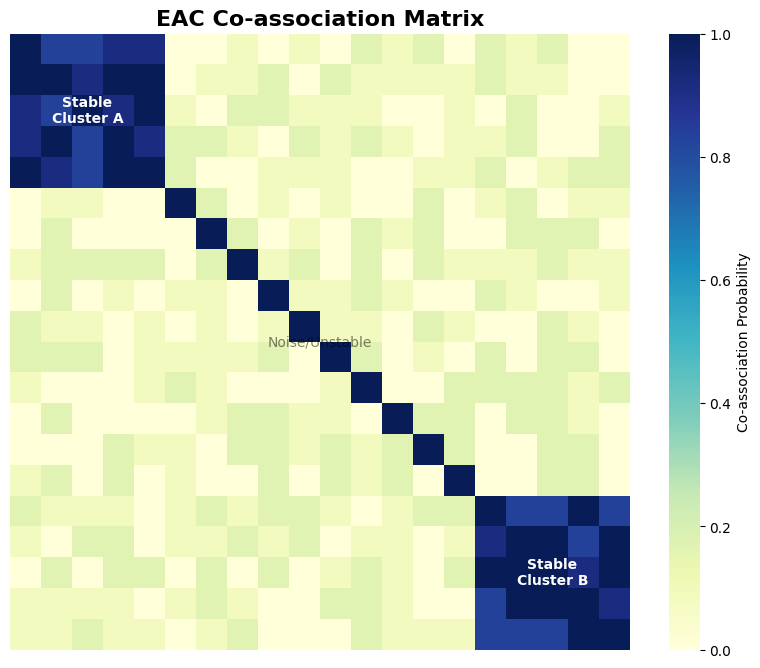

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_dtw_concept():
    """
    生成 Slide 1 所需的 Euclidean vs DTW 對比圖
    """
    # 建立兩個相似但錯位的波形 (Sine waves)
    x = np.linspace(0, 20, 100)
    s1 = np.sin(x)
    s2 = np.sin(x - 3) # 延遲發生 (Shift)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # --- 左圖：Euclidean Distance (Vertical Mapping) ---
    ax1.plot(x, s1 + 2, 'b-', label='Series A (Normal)')
    ax1.plot(x, s2, 'g-', label='Series B (Shifted)')
    ax1.set_title("Euclidean Distance\n(Rigid / Mismatched)", fontsize=14, fontweight='bold', color='darkred')
    ax1.axis('off')
    
    # 畫垂直連接線 (代表硬性比對)
    for i in range(0, 100, 5):
        ax1.plot([x[i], x[i]], [s1[i] + 2, s2[i]], 'k-', alpha=0.2)
        
    ax1.text(10, 3.1, "Misses the pattern!", ha='center', color='red', fontsize=12)

    # --- 右圖：DTW (Dynamic Mapping) ---
    ax2.plot(x, s1 + 2, 'b-', label='Series A')
    ax2.plot(x, s2, 'g-', label='Series B')
    ax2.set_title("Dynamic Time Warping\n(Flexible / Optimal Match)", fontsize=14, fontweight='bold', color='darkgreen')
    ax2.axis('off')
    
    # 模擬 DTW 的斜向連接線 (Connecting similar shapes)
    # 手動映射波峰對波峰，波谷對波谷
    peaks_1 = [1.5, 7.8, 14.1] # Approximate peak indices for s1
    peaks_2 = [4.7, 10.9, 17.2] # Approximate peak indices for s2
    
    # 畫一些示意性的斜線
    for i in range(0, 100, 5):
        # 簡單模擬：讓 index j 稍微偏移以匹配形狀
        j = min(i + 15, 99) 
        ax2.plot([x[i], x[j]], [s1[i] + 2, s2[j]], 'k-', alpha=0.3)
        
    ax2.text(10, 3.1, "Captures the shape!", ha='center', color='green', fontsize=12)

    plt.tight_layout()
    plt.savefig('dtw_concept.png')
    plt.show()

def plot_eac_concept():
    """
    生成 Slide 9 所需的 EAC 共現矩陣示意圖
    """
    np.random.seed(1)
    
    # 模擬 20 個資料點
    n_samples = 20
    
    # 1. 建立一個 "Ground Truth" 矩陣 (理想結果)
    # 前 5 個是一群，後 5 個是一群，中間雜訊
    perfect_matrix = np.zeros((n_samples, n_samples))
    perfect_matrix[0:5, 0:5] = 1 # Cluster 1
    perfect_matrix[15:20, 15:20] = 1 # Cluster 2
    
    # 2. 模擬多次分群的累積結果 (加入一些隨機雜訊)
    # 讓核心區域數值很高 (接近 12)，其他區域很低
    accumulated_matrix = perfect_matrix * 10 # Base evidence
    
    # 加一點隨機雜訊 (模擬不穩定的分群結果)
    noise = np.random.randint(0, 3, size=(n_samples, n_samples))
    accumulated_matrix += noise
    
    # 讓對角線最亮
    np.fill_diagonal(accumulated_matrix, 12)
    
    # 正規化到 0~1 之間方便畫圖
    accumulated_matrix = accumulated_matrix / 12.0
    
    # --- 繪圖 ---
    plt.figure(figsize=(10, 8))
    
    # 使用 Seaborn 畫熱力圖
    ax = sns.heatmap(accumulated_matrix, cmap="YlGnBu", 
                     xticklabels=False, yticklabels=False,
                     cbar_kws={'label': 'Co-association Probability'})
    
    plt.title("EAC Co-association Matrix", fontsize=16, fontweight='bold')
    
    # 標示出強關聯區塊
    plt.text(2.5, 2.5, "Stable\nCluster A", ha='center', va='center', color='white', fontweight='bold')
    plt.text(17.5, 17.5, "Stable\nCluster B", ha='center', va='center', color='white', fontweight='bold')
    plt.text(10, 10, "Noise/Unstable", ha='center', va='center', color='black', alpha=0.5)
    
    plt.savefig('eac_heatmap.png')
    plt.show()

if __name__ == "__main__":
    print("Generating DTW plot...")
    plot_dtw_concept()
    print("Generating EAC plot...")
    plot_eac_concept()